# 28. HEPTA: CLUSTER MODEL TRAINING
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

hepta = pd.read_csv('data/hepta_df')
print(hepta.shape)
hepta.head()

(212, 4)


,col1,col2,col3,labels
0,-6.327e-02,0.028,0.023,1
1,-7.310e-04,0.048,0.069,1
2,-6.077e-02,-0.009,0.053,1
3,1.325e-02,-0.012,0.055,1
4,-5.451e-02,-0.004,0.002,1


In [2]:
hepta['labels'].value_counts()

1    32
7    30
6    30
5    30
4    30
3    30
2    30
Name: labels, dtype: int64

In [3]:
X_train = hepta.drop('labels', axis=1)
X_train.shape

(212, 3)

## 2. The Elbow Method for Finding Optimal N-Clusters

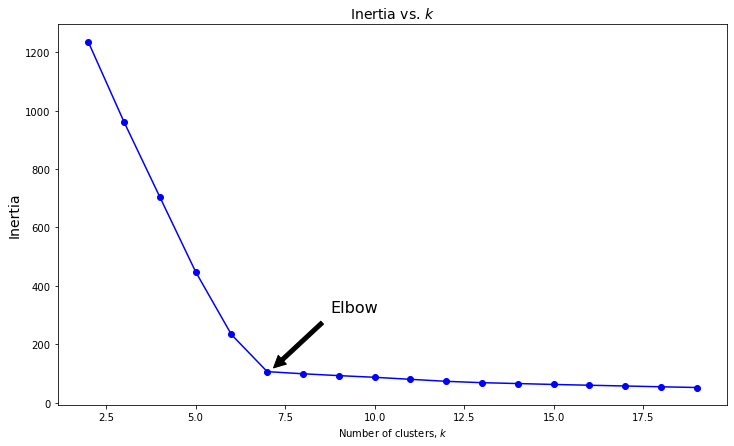

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(2, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 7))
plt.plot(range(2, 20), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(7, inertias[6]),
             xytext=(0.45, 0.30),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

From the graph above, it is clear that `the optimum number of clusters is 7`, it is when the `within cluster sum of squares (WCSS)`, or `inertia`, doesn't decrease significantly with every iteration. 

## 3. The Silhouette Score Method for Finding Optimal N_Clusters

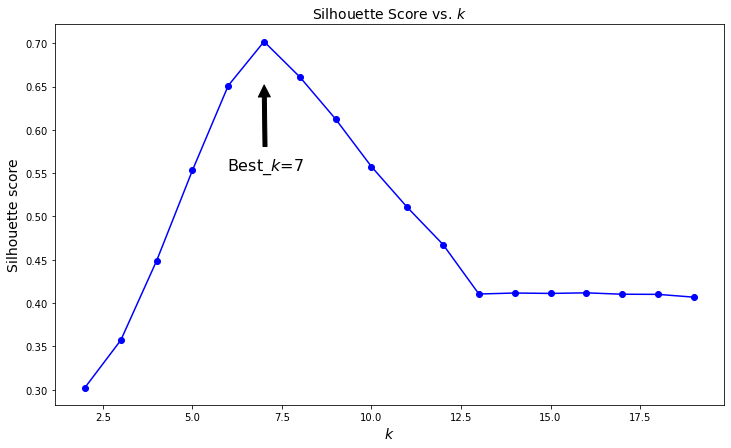

In [62]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) 
                     for model in kmeans_per_k]

plt.figure(figsize=(12, 7))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.title('Silhouette Score vs. $k$', fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Best_$k$=7',
             xy=(7, silhouette_scores[6]),
             xytext=(0.31, 0.62),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 4. Silhouette Analysis for KMeans Clustering
Analyzing the best 4 k clusters: 5, 6, 7, and 8

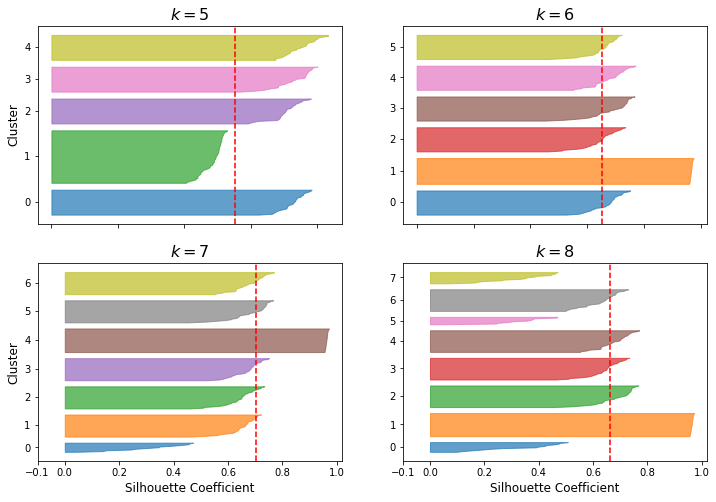

In [86]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(12, 8))

for k in (5, 6, 7, 8):
    plt.subplot(2, 2, k - 4)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.tab10(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 7):
        plt.ylabel("Cluster", fontsize=12)
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## 5. KMeans Clustering at k=7

In [90]:
kmeans = KMeans(n_clusters=7)
y_pred = kmeans.fit_predict(X_train)
y_pred

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([30, 30, 30, 30, 30, 30, 32], dtype=int64))

This is pretty good. Other than the fact that we have different label names compared to `hepta['labels]`, this is pretty accurate. Let's confirm that. 
## 6. Evaluating KMeans Performance
#### i. Adjusted Rand Index
The `Adjusted Rand Index` is a function that measures the similarity of two assignments

In [93]:
from sklearn import metrics

y_true = hepta['labels']
metrics.adjusted_rand_score(y_true, y_pred)

1.0

In [94]:
metrics.adjusted_rand_score(y_pred, y_true)

1.0

ARI is symmetric, meaning that swapping the argument does not change the score.

Our model is **100% accurate**!

#### ii. Mutual Information based scores

In [95]:
metrics.adjusted_mutual_info_score(y_true, y_pred)

1.0

In [96]:
metrics.normalized_mutual_info_score(y_true, y_pred)  

1.0

In [97]:
metrics.mutual_info_score(y_true, y_pred)

1.9456472294419216

Perfect labeling is scored 1.0 for both `adjusted_mutual_info_score` and `normalized_mutual_info_score`. However, this is not true for `mutual_info_score`, which makes it harder to judge.

#### iii. Homogeneity, completeness and V-measure
- `homogeneity`: each cluster contains only members of a single class
- `completeness`: all members of a given class are assigned to the same cluster
- `V-measure`: their harmonic mean

These metrics are equivalent to precision, recall, and F1 score for classification

In [98]:
metrics.homogeneity_score(y_true, y_pred)

1.0000000000000002

In [99]:
metrics.completeness_score(y_true, y_pred)

1.0

In [100]:
metrics.v_measure_score(y_true, y_pred)

1.0000000000000002

In [101]:
# all at once
metrics.homogeneity_completeness_v_measure(y_true, y_pred)

(1.0000000000000002, 1.0, 1.0000000000000002)

**Note:** 
- `v_measure_score` is symmetric: it can be used to evaluate the agreement of two independent assignments on the same dataset.
- This is not the case for completeness_score and homogeneity_score: both are bound by the relationship: 
$homogeneity\_score(a, b) == completeness\_score(b, a)$